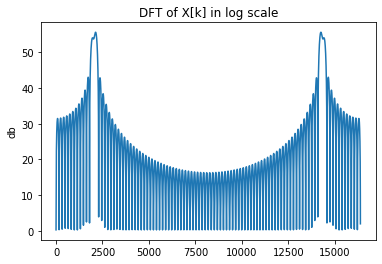

In [1]:
from __future__ import division
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy 

#2.1
N = 16282
zeros = np.zeros(8141)
n = np.arange(101)
x = 10*np.cos(0.24*np.pi*n + 0.2*np.pi) + 12*np.sin(0.26*np.pi*n-0.8*np.pi)

x2 = np.concatenate((zeros,x),axis=None)
x2 = np.concatenate((x2,zeros),axis=None)

dft = np.fft.fft(x2)
db=20*np.log10(np.abs(dft))
plt.ylabel("db")
plt.title("DFT of X[k] in log scale")
plt.plot(db)
plt.show()


In [3]:
import cmath as cm
n = np.arange(-4,0)
xc=10*np.cos(0.24*np.pi*n + 0.2*np.pi) + 12*np.sin(0.26*np.pi*n-0.8*np.pi)
x=np.concatenate((x,xc),axis=None)

f=np.zeros((5,5),dtype=float)
       
for m in range(0,101):
    for i in range(5):
        for k in range(5):
            f[i][k]+=x[m-i]*x[m-k]
psi=np.zeros((4,1))
Fi=np.zeros((4,4))

for i in range(1,5):
    psi[i-1]=f[i][0]
    for k in range(1,5):
        Fi[i-1][k-1]=f[i][k]

#ak calculation
a=np.linalg.solve(Fi,psi)
#Acov[z] roots and coeffs
Azcoeff=[1,-a[0],-a[1],-a[2],-a[3]]
Aroots=np.roots(Azcoeff)
#ploting for 2.2d
N=16384
ni=np.arange(0,N)

j=cm.sqrt(-1)
i=(j*2*np.pi*ni/N)
z=np.exp(i)
#
Az=1
for l in range(1,5):
    hlp=z**(l)
    Az+=Azcoeff[l]*hlp
H=1/np.abs(Az)
print(Az)
plt.plot(20*np.log10(H))
plt.ylabel("db")
plt.title("DFT of X[k] and 1/A(e^jω) in log scale")
plt.plot(db)
plt.show()
#factorisation
Af=(z-Aroots[0])*(z-Aroots[1])*(z-Aroots[2])*(z-Aroots[3])
print(Aroots)
Hf=1/np.abs(Af)
plt.plot(ni,20*np.log10(Hf))
plt.plot(db)
plt.ylabel("db")
plt.title("DFT of X[k] and 1/A(e^jω) in log scale")
plt.show()



[0.34199052+0.j         0.34199025+0.0002623j  0.34198943+0.00052461j ...
 0.34198807-0.00078691j 0.34198943-0.00052461j 0.34199025-0.0002623j ]


[0.68454711+0.72896863j 0.68454711-0.72896863j 0.72896863+0.68454711j
 0.72896863-0.68454711j]


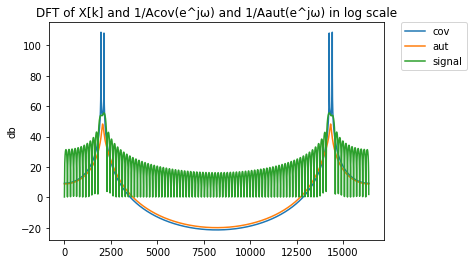

In [10]:

n = np.arange(101)
x = 10*np.cos(0.24*np.pi*n + 0.2*np.pi) + 12*np.sin(0.26*np.pi*n-0.8*np.pi)

h=np.hamming(101)
x=x*h
f=np.zeros((5,5),dtype=float)
r=np.zeros((5,1),dtype=float)
for i in range(5):
    for k in range(5):
        hlp=np.abs(i-k)
        for m in range(0,101-hlp):        
            f[i][k]+=x[m+i-k]*x[m]
        r[hlp]=f[i][k]
psi=np.zeros((4,1))
Fi=np.zeros((4,4))

for i in range(4):
    psi[i]=r[i+1]
    for k in range(4):
        if k>=i:
            Fi[i][k]=r[k-i]
        elif k<i:
            Fi[i][k]=r[i-k]

a=np.linalg.solve(Fi,psi)
#print("ak:",a)
"""
Aaut=np.zeros((101,1),dtype=float)
print(Acov.shape)

for k in range(4):
    for z in range(1,101):
        Aaut[z][0]=1-a[k][0]*z**(-k)
    zo=0.000000000000000000001
    Aaut[0]=1-a[k][0]*zo**(-k)
print(Aaut)

def Aau(p):
    Aaut=np.zeros((len(p),1),dtype=float)
    for k in range(4):
        for z in range(1,len(p)):
            Aaut[z][0]=1-a[k][0]*z**(-k)
    return Aaut
#print(Aau(n)
coeff2=[1,-a[0],-a[1],-a[2],-a[3]]
roots2=np.roots(coeff)
print(roots)

#i=np.imag(2*np.pi*n/1024)
#v=np.exp(i)
#plt.plot(1/np.abs(Aau(v)))
#plt.show()
"""
#plotting for 2.2d
Azcoeff=[1,-a[0],-a[1],-a[2],-a[3]]
Aroots=np.roots(Azcoeff)

N=16384
ni=np.arange(0,N)

j=cm.sqrt(-1)
i=(j*2*np.pi*ni/N)
z=np.exp(i)
#
Az=1
for l in range(1,5):
    hlp=z**(l)
    Az+=Azcoeff[l]*hlp
Hz=1/np.abs(Az)
plt.plot(20*np.log10(Hf),label="cov")
plt.plot(20*np.log10(Hz),label="aut")
plt.ylabel("db")
plt.title("DFT of X[k] and 1/Acov(e^jω) and 1/Aaut(e^jω) in log scale")
plt.plot(db,label="signal")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
plt.plot(x)
plt.title("Windowed signal")
plt.show()

        

In [4]:
""""
#trash code
zeros = np.zeros((8141,1))
print(zeros.shape)
x5=1/np.abs(Acov)
print(x5.shape)
x3 = np.concatenate((zeros,x5),axis=None)
x3 = np.concatenate((x3,zeros),axis=None)
x6=1/np.abs(Aaut)
x4 = np.concatenate((zeros,x6),axis=None)
x4 = np.concatenate((x4,zeros),axis=None)
db1=20*np.log(np.abs(x3))
db2=20*np.log(np.abs(x4))
db=20*np.log(np.abs(dft))
#plt.subplot(111)
plt.plot(np.abs(db))
plt.plot(np.abs(db1))
plt.plot(np.abs(db2))
#plt.show
zeros = np.zeros((8141,1))
print(zeros.shape)
x5=1/np.abs(Acov)
x6=1/np.abs(Aaut)
db1=20*p.log(np.abs(x5))
db2=20*np.log(np.abs(x6))
db=20*np.log(np.abs(dft))
x3 = np.concatenate((zeros,db1),axis=None)
x3 = np.concatenate((db1,zeros),axis=None)
x4 = np.concatenate((zeros,db2),axis=None)
x4 = np.concatenate((db2,zeros),axis=0)

#plt.subplot(111)
#plt.plot(np.abs(db))
plt.plot(np.abs(db1))
plt.plot(np.abs(db2))
#plt.show()
plt.show()
"""

'"\n#trash code\nzeros = np.zeros((8141,1))\nprint(zeros.shape)\nx5=1/np.abs(Acov)\nprint(x5.shape)\nx3 = np.concatenate((zeros,x5),axis=None)\nx3 = np.concatenate((x3,zeros),axis=None)\nx6=1/np.abs(Aaut)\nx4 = np.concatenate((zeros,x6),axis=None)\nx4 = np.concatenate((x4,zeros),axis=None)\ndb1=20*np.log(np.abs(x3))\ndb2=20*np.log(np.abs(x4))\ndb=20*np.log(np.abs(dft))\n#plt.subplot(111)\nplt.plot(np.abs(db))\nplt.plot(np.abs(db1))\nplt.plot(np.abs(db2))\n#plt.show\nzeros = np.zeros((8141,1))\nprint(zeros.shape)\nx5=1/np.abs(Acov)\nx6=1/np.abs(Aaut)\ndb1=20*p.log(np.abs(x5))\ndb2=20*np.log(np.abs(x6))\ndb=20*np.log(np.abs(dft))\nx3 = np.concatenate((zeros,db1),axis=None)\nx3 = np.concatenate((db1,zeros),axis=None)\nx4 = np.concatenate((zeros,db2),axis=None)\nx4 = np.concatenate((db2,zeros),axis=0)\n\n#plt.subplot(111)\n#plt.plot(np.abs(db))\nplt.plot(np.abs(db1))\nplt.plot(np.abs(db2))\n#plt.show()\nplt.show()\n'

C:\Users\Thanasis\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


C:\Users\Thanasis\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


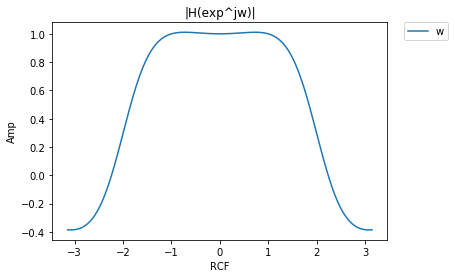

In [12]:
#ask 2.5
omega=np.linspace(-2*np.pi,2*np.pi,2000)
Omega=np.linspace(-np.pi,np.pi,1000)
j=cm.sqrt(-1)
s=j*Omega
z=np.exp(j*omega)
Ha=5/(s**2+2*s+5)
Hz=2.5*np.exp(-1)*z**(-1)*np.sin(2)/(np.exp(-2)*z**2-2*np.exp(-1)*z**(-1)*np.cos(2)+1)
plt.plot(omega,Hz,label="z")
plt.xlabel("RDF")
plt.ylabel("Amp")
plt.title("|H(exp^jw)|")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
plt.plot(Omega,Ha,label="w")
plt.xlabel("RCF")
plt.ylabel("Amp")
plt.title("|H(exp^jw)|")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()